# Airline - RNN Time Series

- Simple RNN network for time series prediction is built using 'international-airline-passengers' database.
- Keras with TensorFlow backend

https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=area

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.layers import Input, Dense, SimpleRNN
from keras.models import Sequential

from sklearn import model_selection

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Prepare Data

In [2]:
def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y

# Import from csv data
fname='./../dataset/international-airline-passengers.csv'
dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
data = dataset.values.reshape(-1)
data_normalize = (data - np.mean(data)) / np.std(data) / 5
X, y = get_Xy(data_normalize, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  

(131, 12, 1) (131,)


### Visualize Data

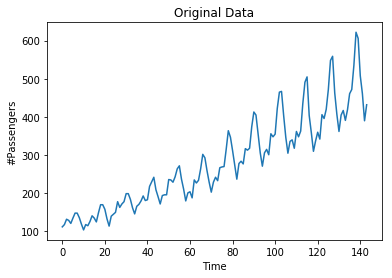

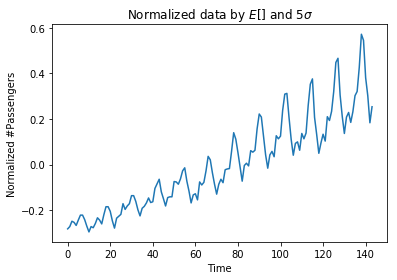

In [3]:
# plot dataset
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Passengers')
plt.title('Original Data')
plt.show()

# normalize
plt.plot(data_normalize)
plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()

## Model

In [4]:
model = Sequential()
model.add(SimpleRNN(10, input_shape = X.shape[1:]))
model.add(Dense(1))

model.compile(optimizer='Adam',
              loss='mean_squared_error')

## Training

In [5]:
model.summary()
history = model.fit(X_train, y_train, epochs=400, validation_data=[X_test, y_test], verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## Result and Analysis 

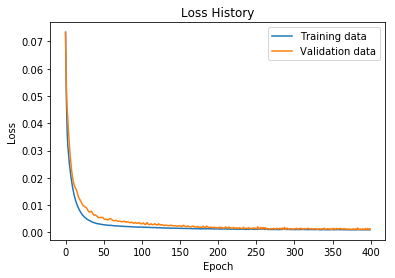

In [6]:
# Display Loss History
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    plt.show()
    
plot_loss(history, 'Loss History')

27/27 [==============================] - 0s 58us/step
Loss: 0.0013534212484955788
prediction shape:  (27, 1) test shape:  (27,)


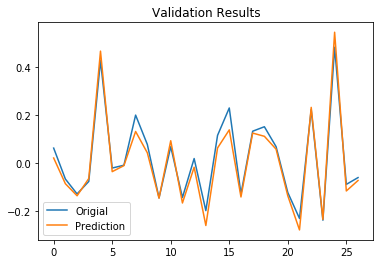

In [7]:
# Display test data prediction
ypredict = model.predict(X_test)
print('Loss:', model.evaluate(X_test, y_test))
print('prediction shape: ', ypredict.shape, 'test shape: ', y_test.shape)
plt.plot(ypredict, label='Origial')
plt.plot(y_test, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

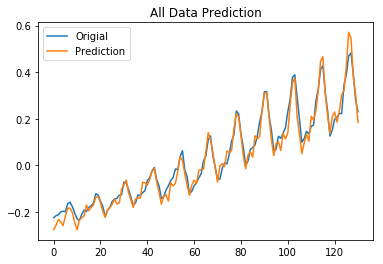

In [8]:
# Display all data prediction
ypredict = model.predict(X)

plt.plot(ypredict, label='Origial')
plt.plot(y, label='Prediction')
plt.legend(loc=0)
plt.title('All Data Prediction')
plt.show()